In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import ta

C:\Users\adamt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\adamt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\adamt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# get the data for a specific ticker and date range
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start = start_date, end = end_date)
    return stock_data

# split the data into training and testing
def train_test_split(data, percent_train, timesteps):
    train_size = int(len(data) * percent_train)
    train_data = data[:train_size]
    test_data = data[train_size - timesteps:]
    return train_data, test_data

# create sequences for the training data
def create_sequences_train(sequence_length, data):
    X = []
    y = []
    
    for i in range(sequence_length, len(data)):
        X.append(data[i - sequence_length:i, :])
        y.append(data[i, 0])
    
    return np.array(X), np.array(y)

# create sequences of data that will be used for the testing set
def create_sequences_test(sequence_length, data):
    X = []
    
    for i in range(sequence_length, len(data)):
        X.append(data[i - sequence_length:i, :])
    
    return np.array(X)

# reshape the X data to the right shape for the model
def reshape_data(data, num_features):
    return np.reshape(data, (data.shape[0], data.shape[1], num_features))

def plot_data(validate_data, stock):
    # visualize 
    plt.figure(figsize = (16, 8))
    plt.title('Model')
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Close Price USD ($)', fontsize = 18)
    plt.plot(validate_data[stock])
    plt.plot(validate_data['Predictions'])
    plt.legend(['Test', 'Predictions'], loc = 'lower right')
    plt.show()
    
def directional_accuracy(validate_data, stock):
    correct = 0
    for i in range(len(validate_data) - 1):
        predicted_direction = validate_data['Predictions'][i + 1] - validate_data['Predictions'][i]
        actual_direction = validate_data[stock][i + 1] - validate_data[stock][i]

        if np.sign(predicted_direction) == np.sign(actual_direction):
            correct += 1

    accuracy = correct / (len(validate_data) - 1)  
    
    return accuracy

In [3]:
def model_1(timesteps, num_features):
    # build the model
    model = Sequential()
    model.add(LSTM(30, return_sequences = True, input_shape = (timesteps, num_features), activation = 'relu'))
    model.add(LSTM(40, return_sequences = False, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    
    # compile the model
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

    return model

In [4]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'GOOGL', 'AMZN', 'JPM', 'XOM', 'WFC', 'MS', 'NKE']

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0923
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0032
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0026
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0021
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0019
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0024
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0019
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0017
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0019
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0019
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0019
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0018
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0015
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0015
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


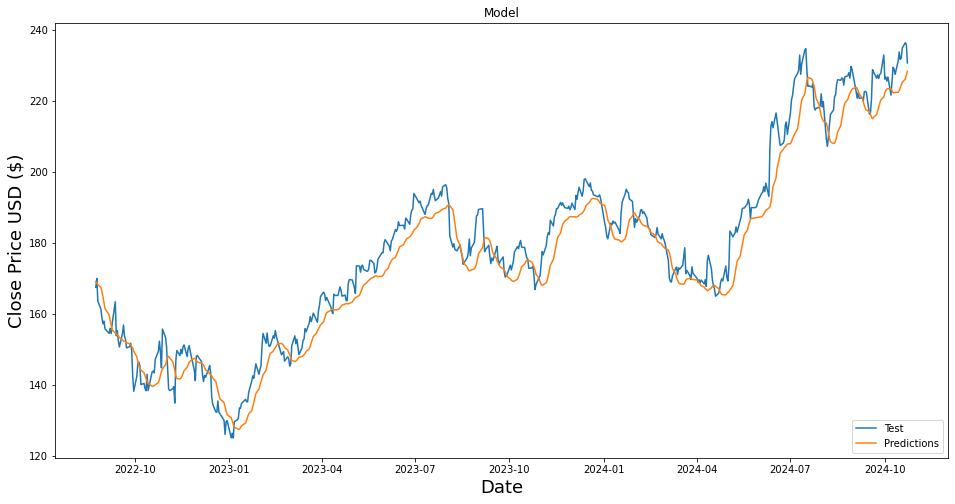

AAPL Directional Accuracy:  0.5294117647058824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1

[*********************100%***********************]  1 of 1 completed


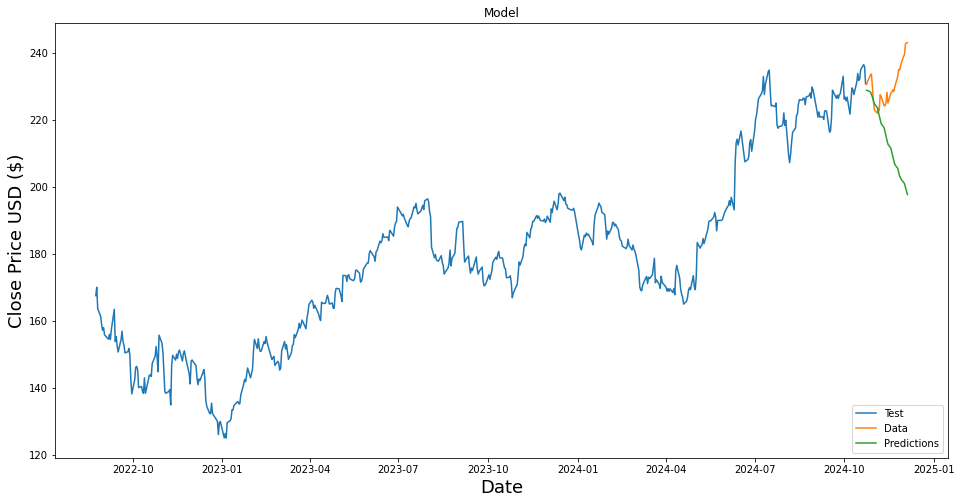

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0869
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0026
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0025
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0024
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0024
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0020
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0019
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0019
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0016
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0022
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0016
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0016
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0015
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0015
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


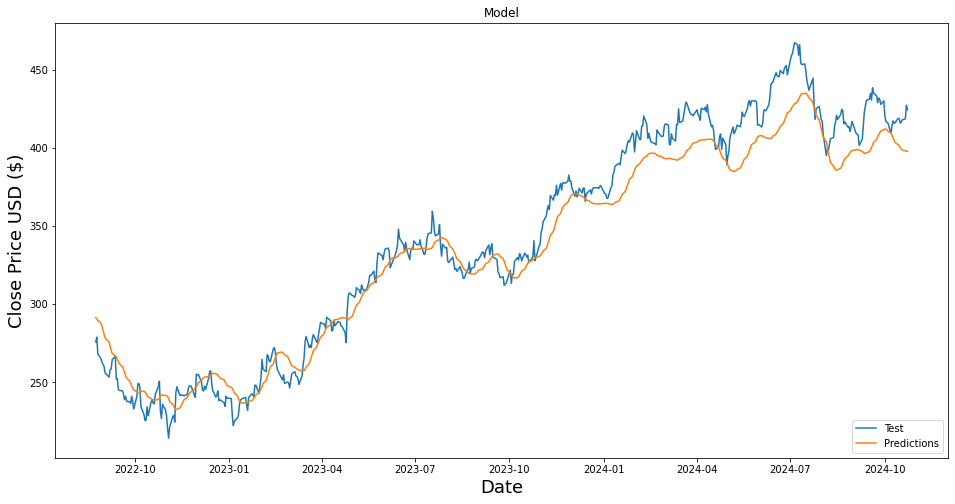

MSFT Directional Accuracy:  0.4963235294117647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/

[*********************100%***********************]  1 of 1 completed


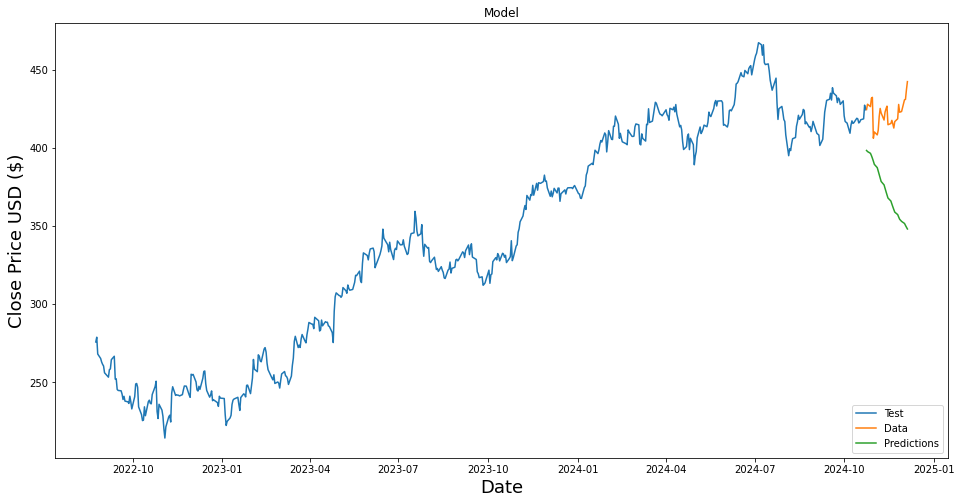

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0651
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0033
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0026
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0019
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0019
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0016
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0019
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0017
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0018
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0016
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0011
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0016
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0015
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0014
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


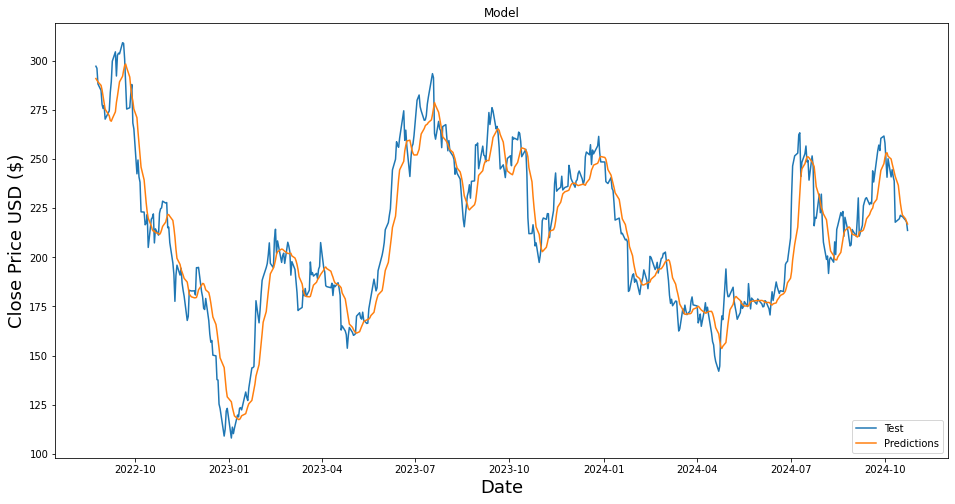

TSLA Directional Accuracy:  0.5422794117647058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1

[*********************100%***********************]  1 of 1 completed


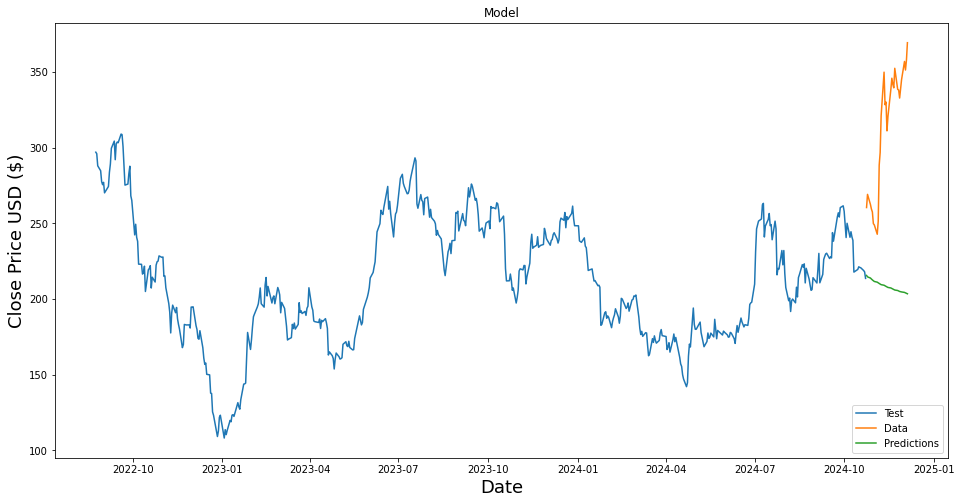

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0465
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0026
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0018
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0027
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0020
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0016
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0016
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0019
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0016
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0019
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0019
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0019
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


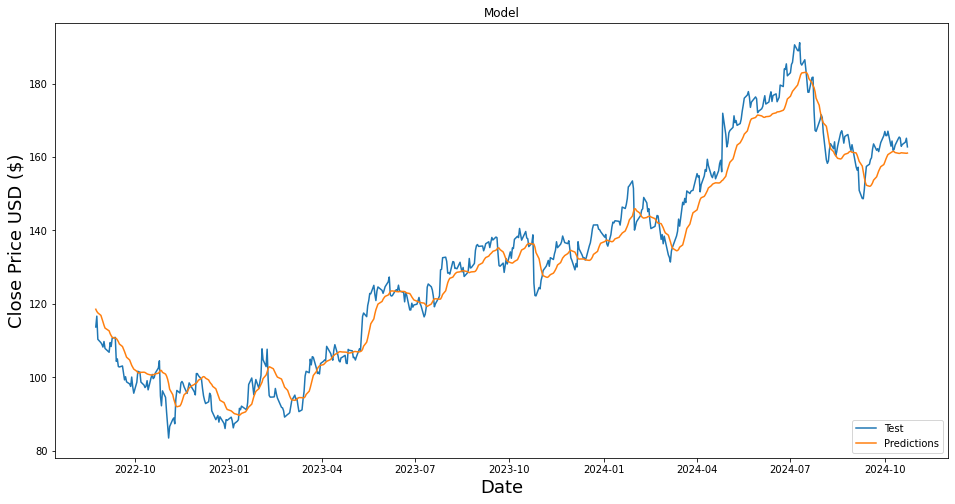

GOOGL Directional Accuracy:  0.47610294117647056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1

[*********************100%***********************]  1 of 1 completed


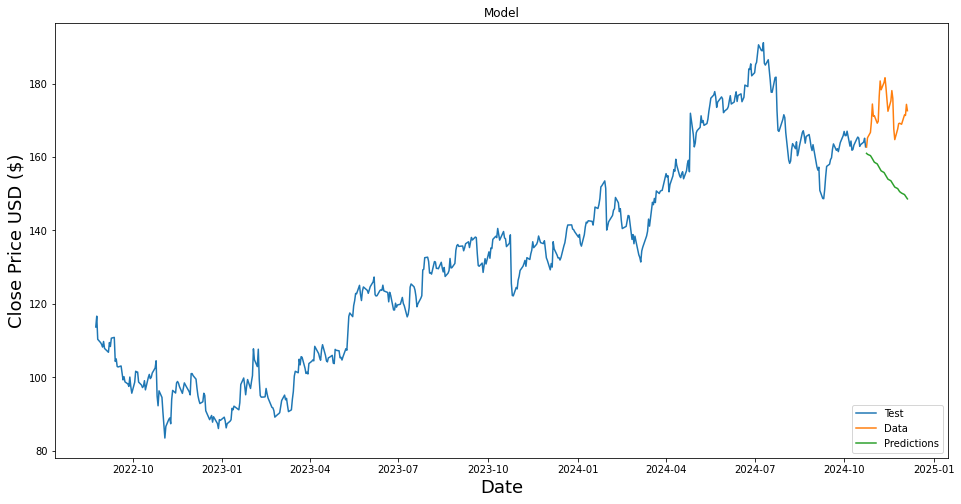

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1196
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0034
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0032
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0034
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0028
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0036
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0029
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0031
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0029
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0027
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0027
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0023
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0022
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0022
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0022
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


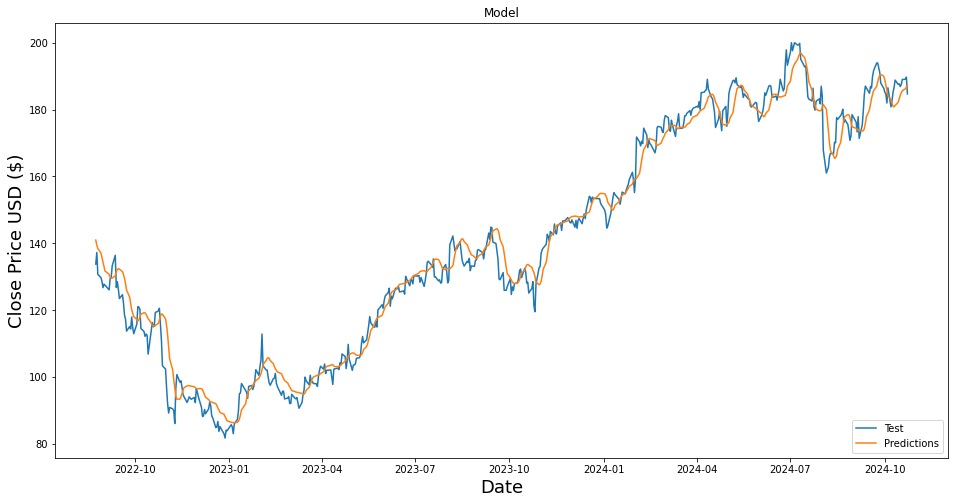

AMZN Directional Accuracy:  0.5036764705882353
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1

[*********************100%***********************]  1 of 1 completed


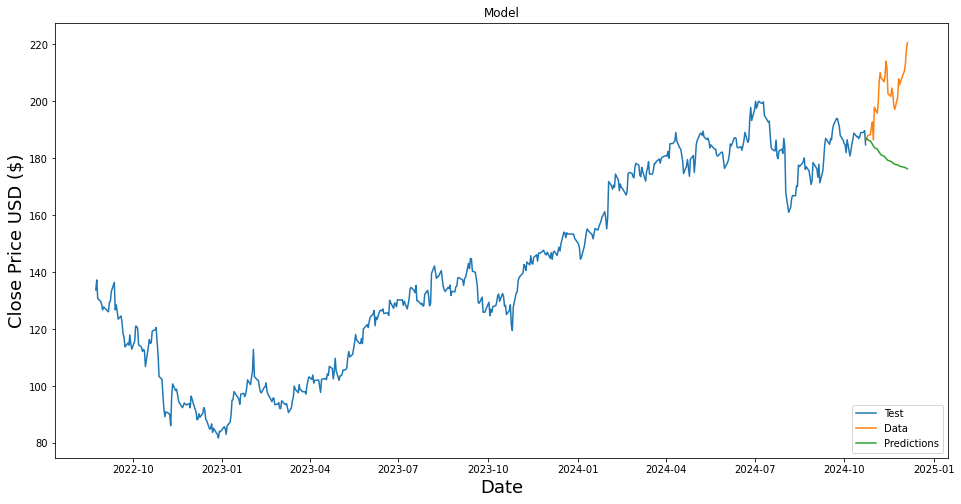

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1266
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0057
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0045
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0041
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0032
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0034
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0030
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0030
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0033
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0029
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0030
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0032
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0028
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0028
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0026
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


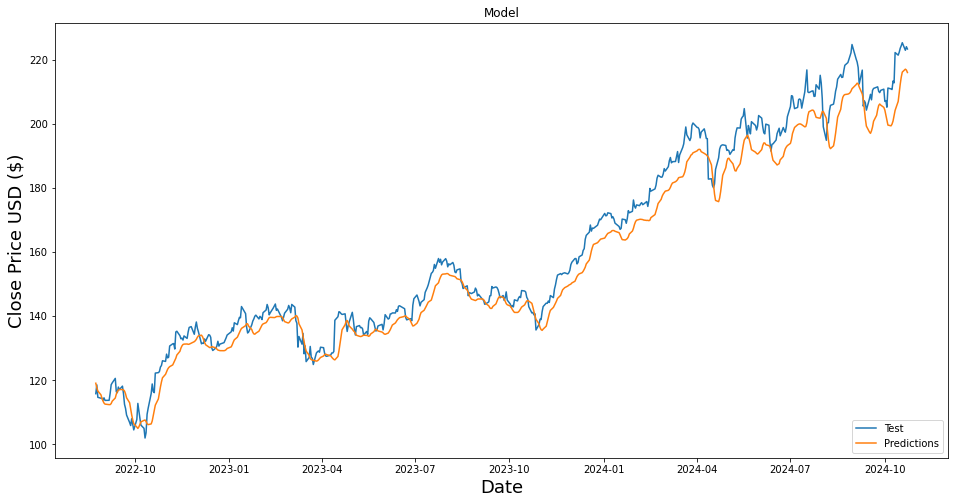

JPM Directional Accuracy:  0.5294117647058824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 

[*********************100%***********************]  1 of 1 completed


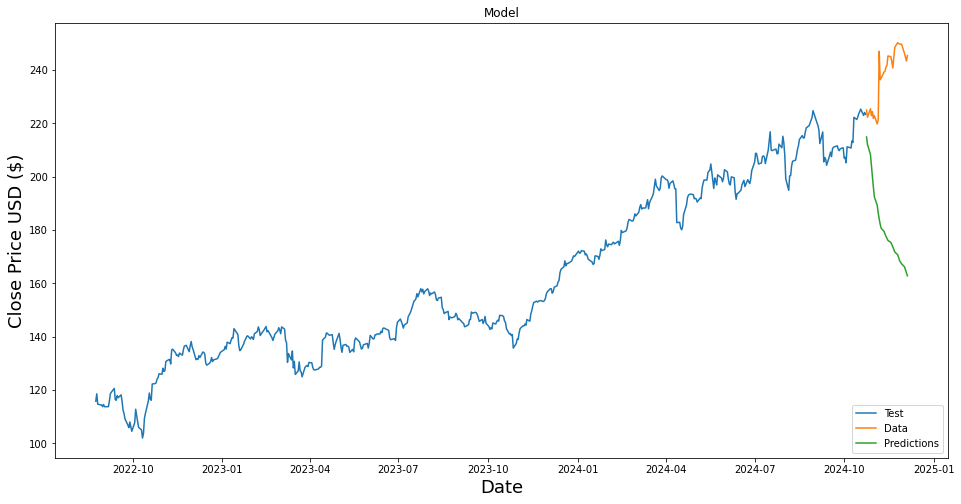

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2269
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0091
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0072
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0071
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0071
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0067
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0068
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0069
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0059
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0053
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0051
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0056
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0046
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0048
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0040
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


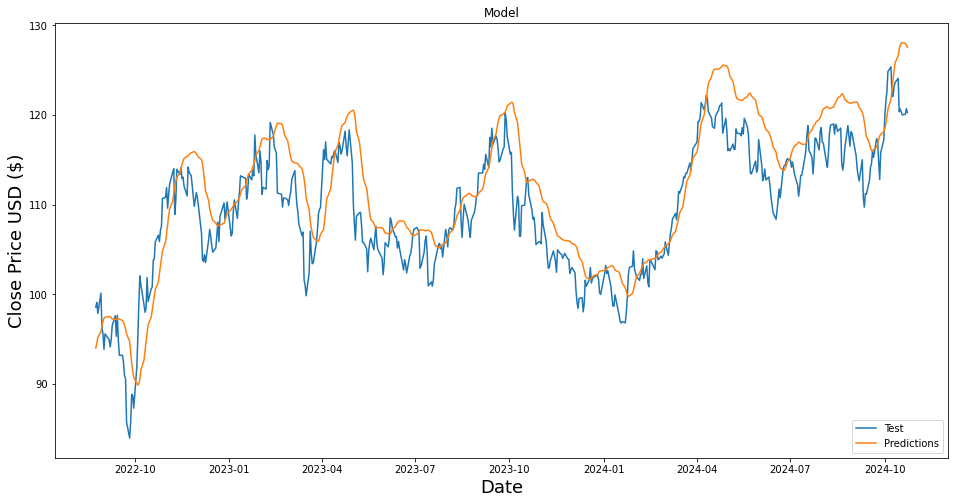

XOM Directional Accuracy:  0.5110294117647058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 

[*********************100%***********************]  1 of 1 completed


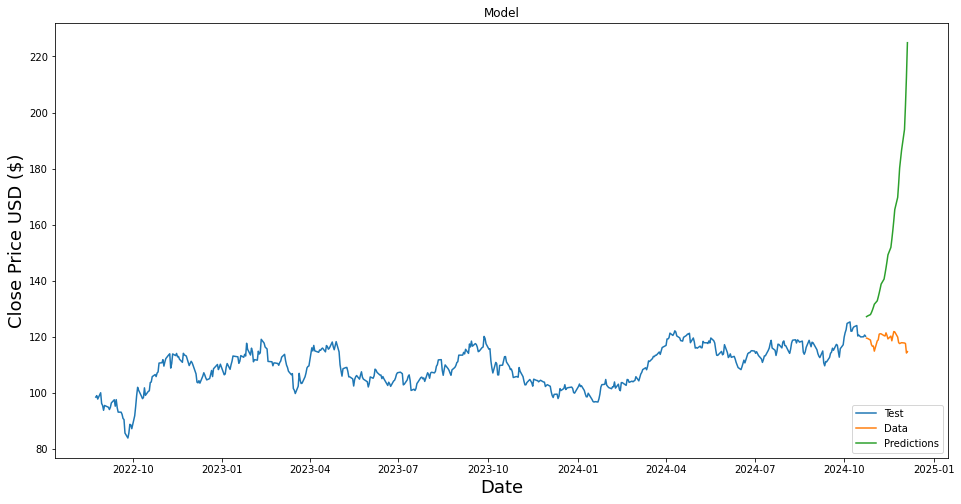

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.2323
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0069
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0078
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0071
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0067
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0068
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0054
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0056
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0054
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0053
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0052
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0044
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0047
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0044
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0043
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


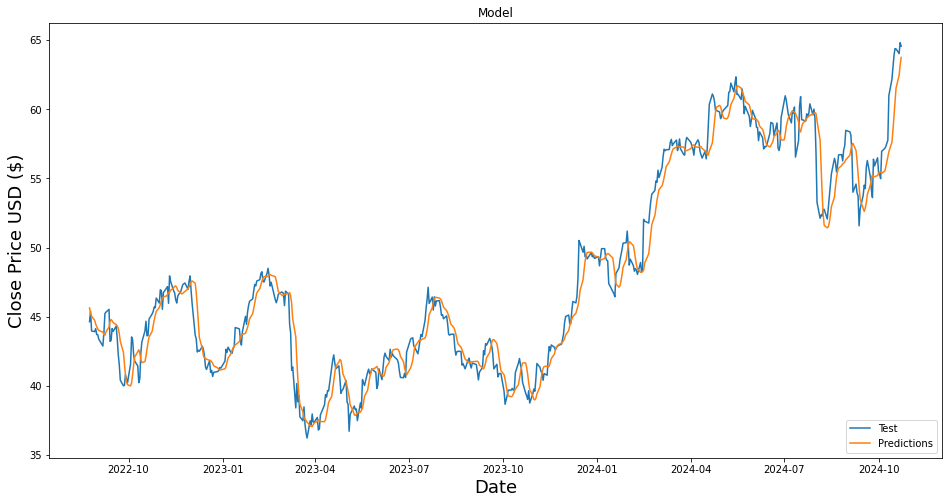

WFC Directional Accuracy:  0.5091911764705882
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[*********************100%***********************]  1 of 1 completed


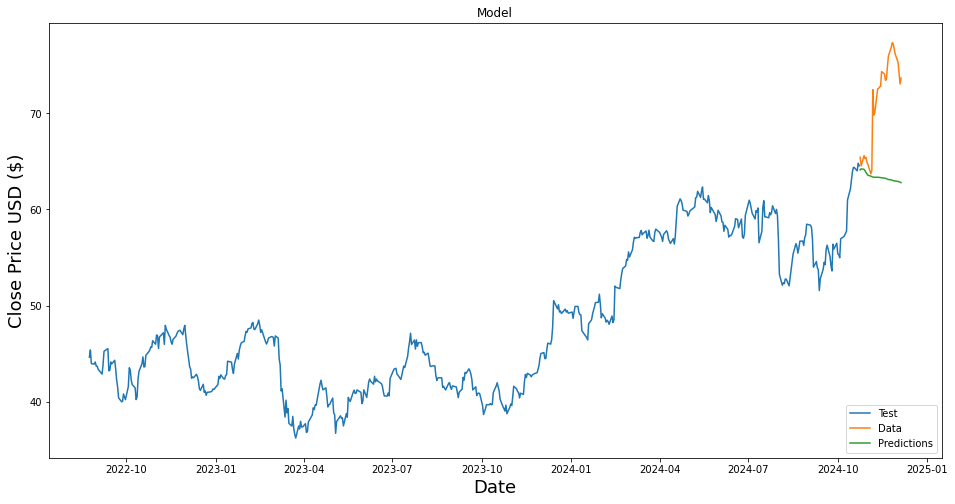

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0682
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0031
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0031
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0026
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0021
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0024
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0021
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0023
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0019
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0020
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0018
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0017
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0017
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0019
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


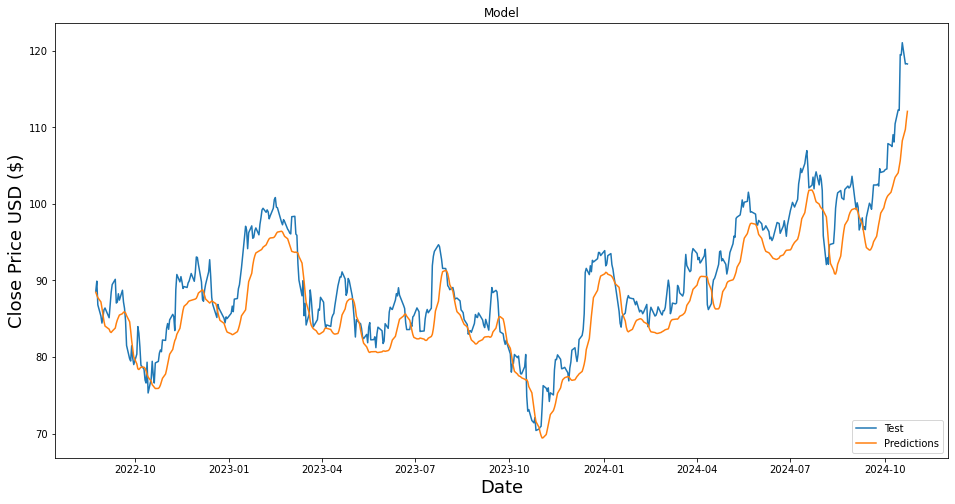

MS Directional Accuracy:  0.5110294117647058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━

[*********************100%***********************]  1 of 1 completed


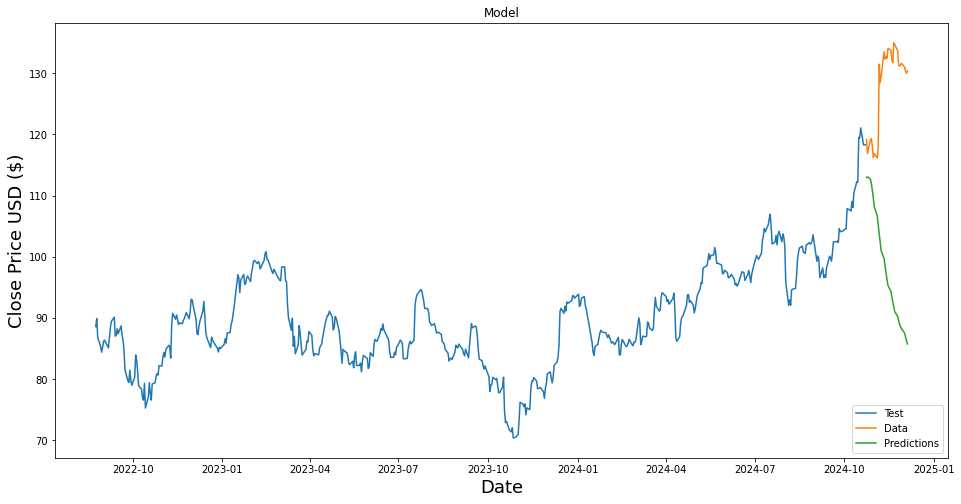

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0946
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0042
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0028
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0026
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0025
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0024
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0023
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0021
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0024
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0022
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0025
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0024
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0025
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0022
Epoch 16/25
67/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/3357270402.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


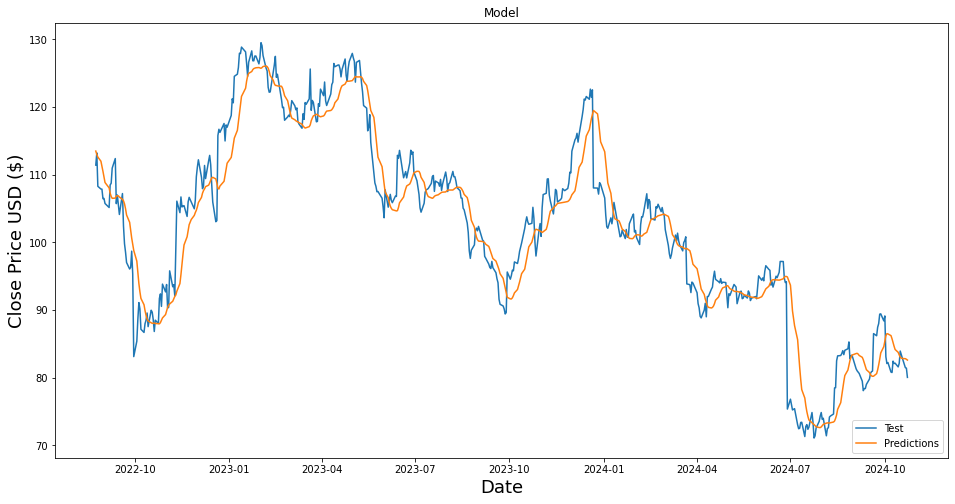

NKE Directional Accuracy:  0.5294117647058824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 

[*********************100%***********************]  1 of 1 completed


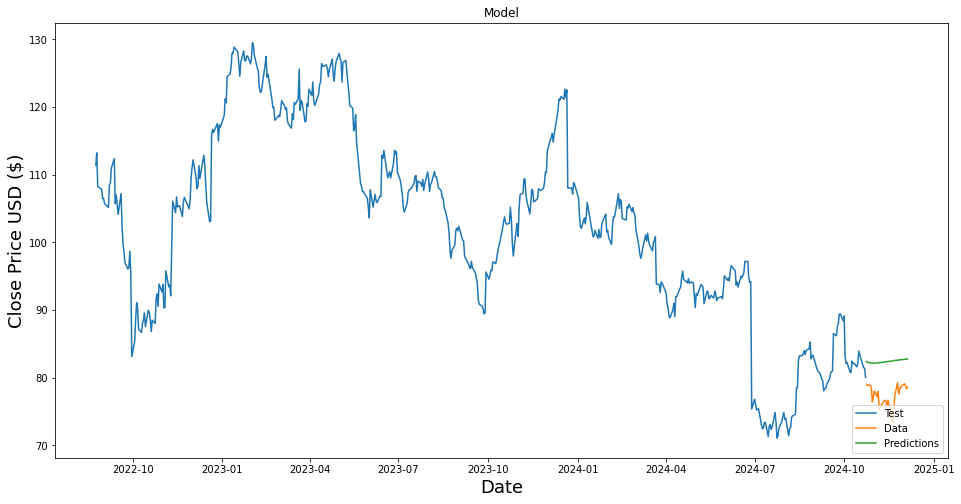

In [5]:
rmse_arr_1 = []
accuracy_1 = []

for ticker in tickers:
    #ticker = 'AAPL'
    start_date = '2014-01-01'
    end_date = '2024-10-24'
    data = get_stock_data(ticker, start_date, end_date)

    # start with predicting using the close price
    data = data['Close']

    # get the train and testing data
    timesteps = 60
    percent_train = .80
    train_data, test_data = train_test_split(data, percent_train, timesteps)

    # scale the data
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_train = scaler.fit_transform(train_data)
    scaled_test = scaler.transform(test_data)

    X_train, y_train = create_sequences_train(timesteps, scaled_train)

    num_features = 1
    X_train = reshape_data(X_train, num_features)

    model = model_1(timesteps, num_features)

    # train the model
    model.fit(X_train, y_train, batch_size = 32, epochs = 25)

    X_test = create_sequences_test(timesteps, scaled_test)
    y_test = test_data[timesteps:]

    # reshape the data
    X_test = reshape_data(X_test, num_features)

    # get the models predicted price values
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    #get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(predictions - y_test.values)**2)
    rmse_arr_1.append(rmse)
    print(ticker + " RMSE: ", rmse)

    # plot the data
    validate_data = test_data[timesteps:]
    validate_data['Predictions'] = predictions
    plot_data(validate_data, ticker)

    dir_accuracy = directional_accuracy(validate_data, ticker)
    accuracy_1.append(dir_accuracy)
    print(ticker + " Directional Accuracy: ", dir_accuracy)

    new_data = data.values[-timesteps:]
    new_data_scaled = scaler.transform(new_data)
    X_test_new = []
    X_test_new.append(new_data_scaled)
    X_test_new = np.array(X_test_new)
    X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], num_features))

    preds = []

    for i in range(30):
        pred_price = model.predict(X_test_new)
        preds.append(scaler.inverse_transform(pred_price)[0][0])    
        val = np.array([pred_price])
        X_test_new = np.append(X_test_new[:, 1:, :], val, axis = 1)

    start_date = '2024-10-24'
    end_date = '2024-12-06'
    data = get_stock_data(ticker, start_date, end_date)
    data = data['Close']

    data['Predictions'] = preds

    plt.figure(figsize = (16, 8))
    plt.title('Model')
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Close Price USD ($)', fontsize = 18)
    plt.plot(validate_data[ticker])
    plt.plot(data[[ticker, 'Predictions']])
    plt.legend(['Test', 'Data', 'Predictions'], loc = 'lower right')
    plt.show()

[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0631
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0024
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0018
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0018
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0015
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0013
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0014
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0011
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0010
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0012
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0011
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0010
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


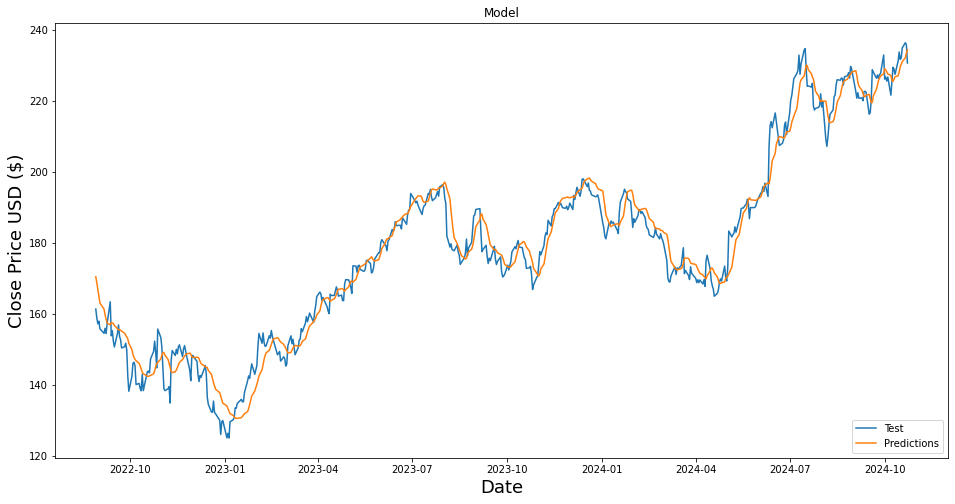

[*********************100%***********************]  1 of 1 completed

AAPL Directional Accuracy:  0.5083179297597042
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1043
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0024
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0019
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0017
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0017
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0019
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0017
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0014
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0016
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0013
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0017
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0013
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0015
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


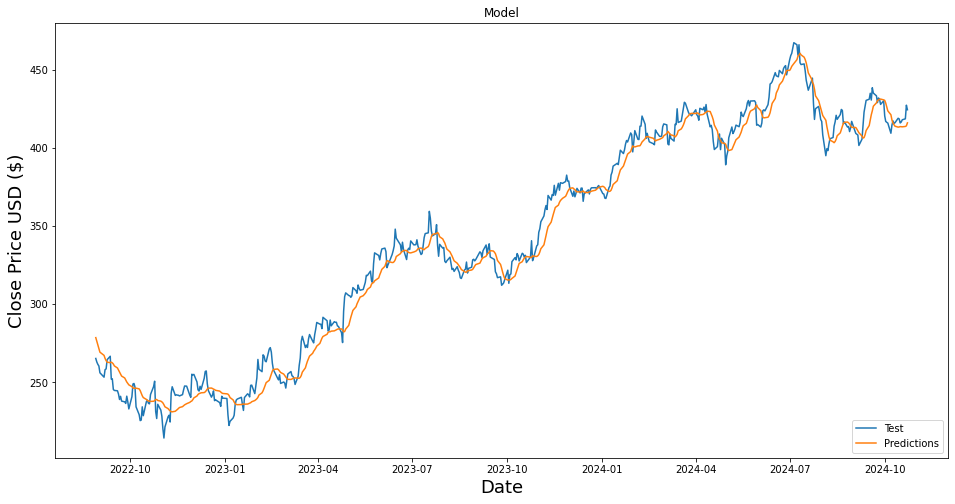

[*********************100%***********************]  1 of 1 completed

MSFT Directional Accuracy:  0.4879852125693161
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0463
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0023
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0021
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0019
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0017
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0016
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0013
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0016
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0015
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0012
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0012
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0010
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0012
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


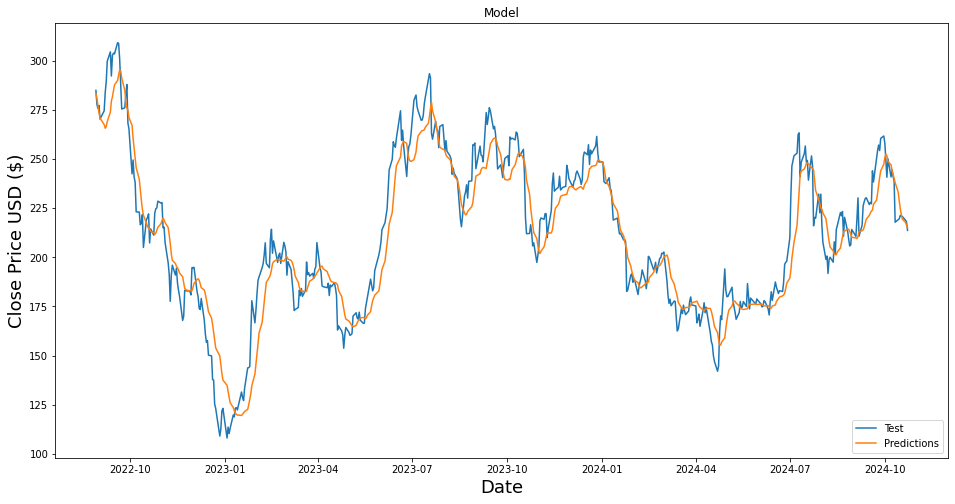

[*********************100%***********************]  1 of 1 completed

TSLA Directional Accuracy:  0.5415896487985212
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1004
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0034
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0026
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0025
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0023
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0026
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0019
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0018
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0020
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0017
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0018
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0016
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0022
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0017
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


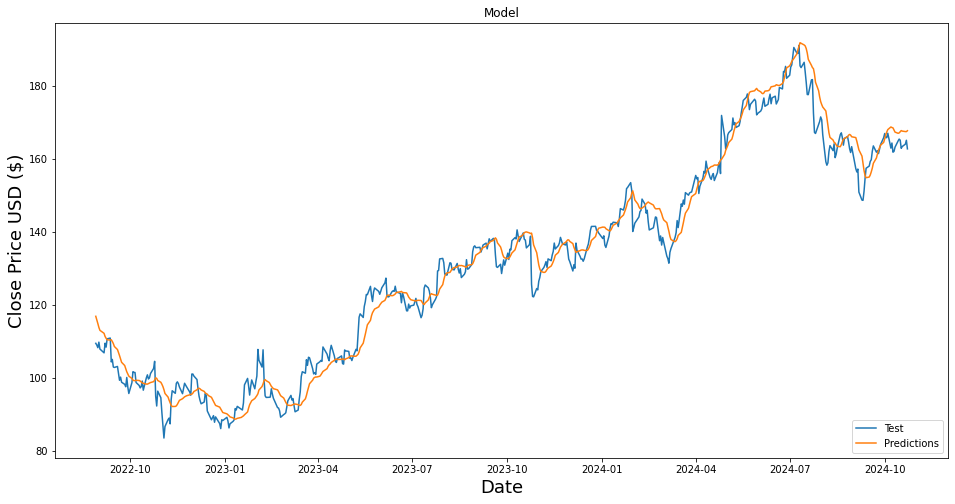

[*********************100%***********************]  1 of 1 completed

GOOGL Directional Accuracy:  0.46950092421441775
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1432
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0037
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0034
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0034
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0031
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0027
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0023
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0025
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0025
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0025
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0024
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0021
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0020
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0019
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0020
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


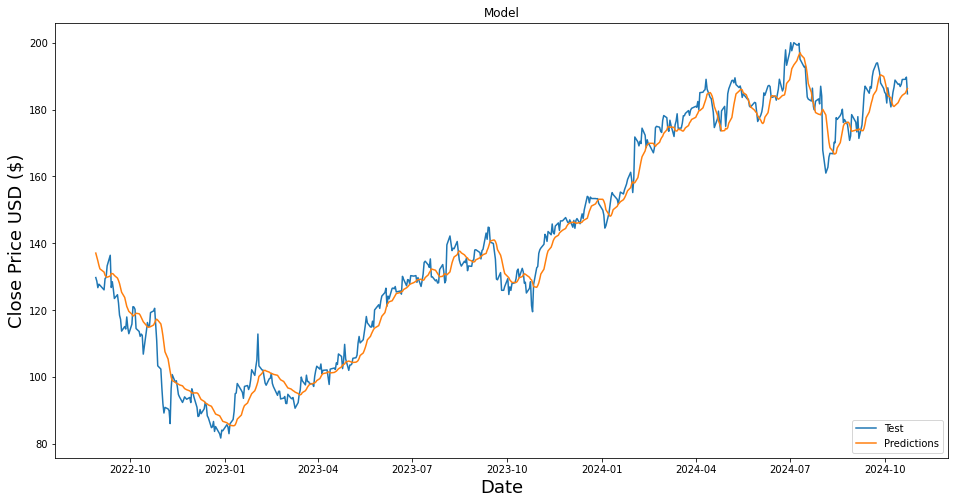

[*********************100%***********************]  1 of 1 completed

AMZN Directional Accuracy:  0.5046210720887245
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0921
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0051
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0036
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0031
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0029
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0028
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0027
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0025
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0025
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0022
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0024
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0023
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0022
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0021
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0019
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


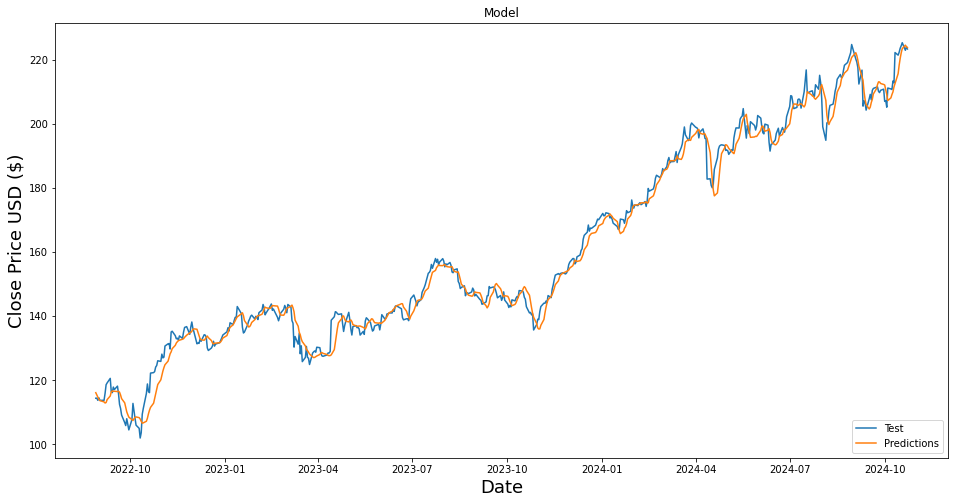

[*********************100%***********************]  1 of 1 completed

JPM Directional Accuracy:  0.5175600739371534
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.1897
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0068
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0051
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0045
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0048
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0044
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0046
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0036
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0038
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0037
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0035
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0035
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0034
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0029
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0028
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


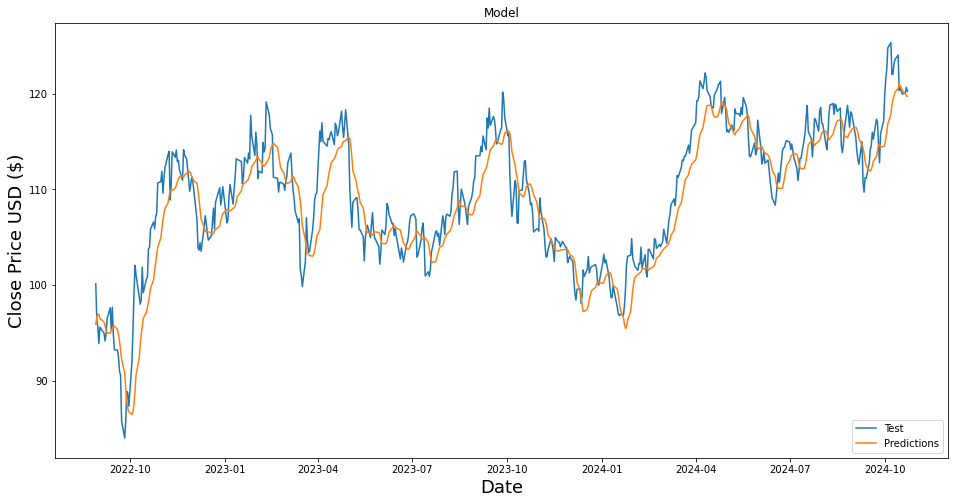

[*********************100%***********************]  1 of 1 completed

XOM Directional Accuracy:  0.5175600739371534
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.1864
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0091
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0072
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0057
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0054
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0046
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0048
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0048
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0041
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0045
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0040
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0041
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0042
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0039
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0036
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


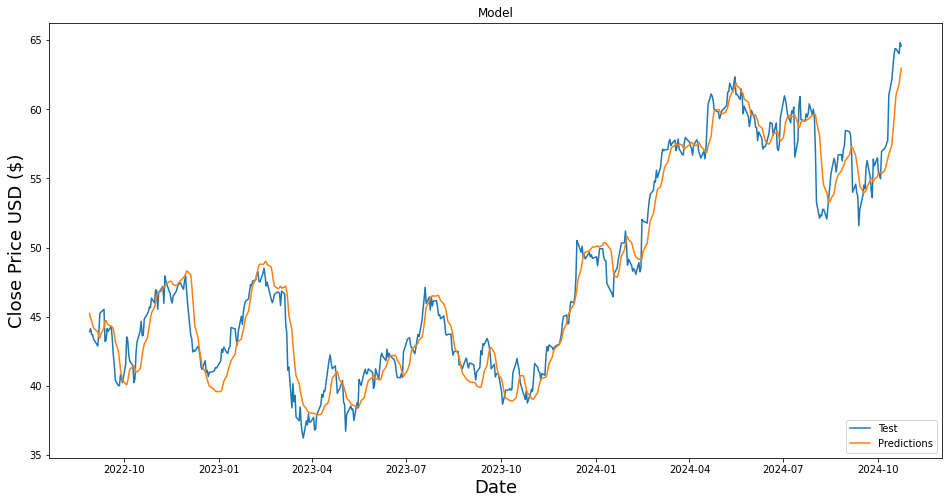

[*********************100%***********************]  1 of 1 completed

WFC Directional Accuracy:  0.5157116451016636
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0907
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0036
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0032
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0027
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0023
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0023
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0019
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0018
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0024
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0019
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0019
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0021
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0016
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0018
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


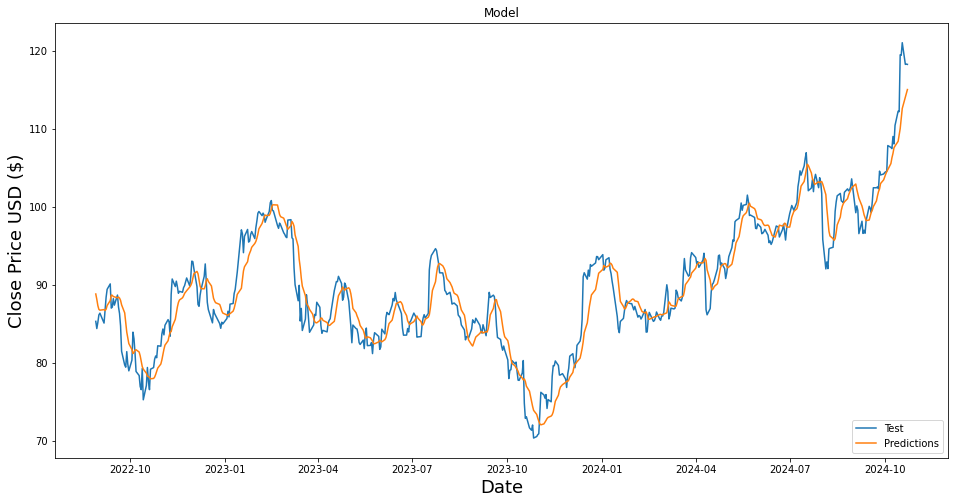

[*********************100%***********************]  1 of 1 completed

MS Directional Accuracy:  0.5231053604436229
Epoch 1/25



C:\Users\adamt\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0706
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0042
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0027
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0023
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0022
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0019
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0018
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0019
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0018
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0020
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0017
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0017
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0018
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0018
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0015
Epoch 16/25
66/

C:\Users\adamt\AppData\Local\Temp/ipykernel_20544/4268848275.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = predictions


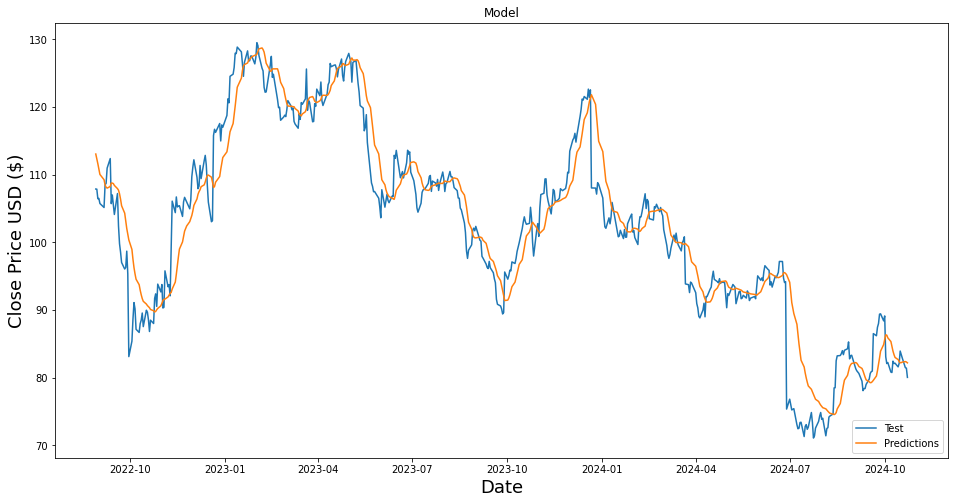

NKE Directional Accuracy:  0.5101663585951941


In [7]:
rmse_arr_2 = []
accuracy_2 = []
for ticker in tickers:
    #ticker = 'AAPL'
    start_date = '2014-01-01'
    end_date = '2024-10-24'
    data = get_stock_data(ticker, start_date, end_date)

    # start with predicting using the close price
    data = data['Close']

    data = data.copy()
    data['RSI'] = ta.momentum.RSIIndicator(data[ticker], window=14).rsi()
    data = data.dropna()

    # get the train and testing data
    timesteps = 60
    percent_train = .80
    train_data, test_data = train_test_split(data, percent_train, timesteps)

    # scale the data
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_train = scaler.fit_transform(train_data)
    scaled_test = scaler.fit_transform(test_data)

    X_train, y_train = create_sequences_train(timesteps, scaled_train)

    num_features = 2
    X_train = reshape_data(X_train, num_features)

    model = model_1(timesteps, num_features)

    # train the model
    model.fit(X_train, y_train, batch_size = 32, epochs = 25)

    X_test = create_sequences_test(timesteps, scaled_test)
    y_test = test_data[timesteps:][ticker]

    # reshape the data
    X_test = reshape_data(X_test, num_features)

    # get the models predicted price values
    predictions = model.predict(X_test)
    preds = np.zeros((len(X_test), num_features))
    preds += predictions  # Now compatible
    predictions = scaler.inverse_transform(preds)[:, 0]

    #get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(predictions - y_test.values)**2)
    rmse_arr_2.append(rmse)
    print(ticker + " RMSE: ", rmse)

    # plot the data
    validate_data = test_data[timesteps:]
    validate_data['Predictions'] = predictions
    plot_data(validate_data, ticker)

    dir_accuracy = directional_accuracy(validate_data, ticker)
    accuracy_2.append(dir_accuracy)
    print(ticker + " Directional Accuracy: ", dir_accuracy)

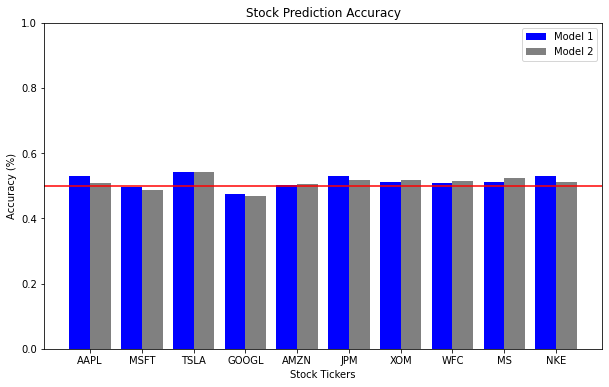

In [32]:
bar_width = 0.4
x = np.arange(len(tickers))
plt.figure(figsize = (10, 6))
plt.bar(x - bar_width/2, accuracy_1, width = bar_width, color = 'blue', label = 'Model 1')
plt.bar(x + bar_width/2, accuracy_2, width = bar_width, color = 'grey', label = 'Model 2')
plt.xlabel('Stock Tickers')
plt.ylabel('Accuracy (%)')
plt.title('Stock Prediction Accuracy')
plt.axhline(y = .50, color = 'red', linestyle = '-')
plt.xticks(x, tickers)
plt.legend()
plt.ylim(0, 1)
plt.show()

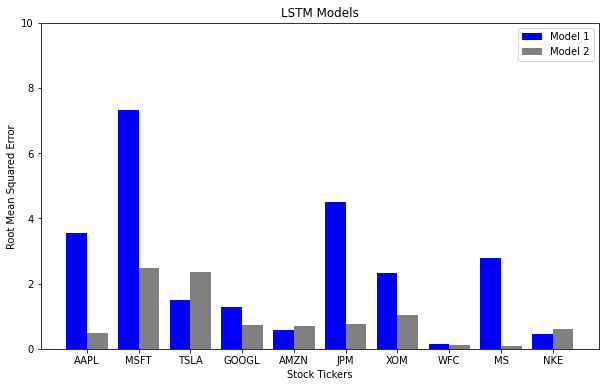

In [34]:
bar_width = 0.4
x = np.arange(len(tickers))
plt.figure(figsize = (10, 6))
plt.bar(x - bar_width/2, rmse_arr_1, width = bar_width, color = 'blue', label = 'Model 1')
plt.bar(x + bar_width/2, rmse_arr_2, width = bar_width, color = 'grey', label = 'Model 2')
plt.xlabel('Stock Tickers')
plt.ylabel('Root Mean Squared Error')
plt.title('LSTM Models')
plt.xticks(x, tickers)
plt.legend()
plt.ylim(0, 10)
plt.show()